In [ ]:
import os

REPO_NAME = "technical-challenge"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/enzoferrari1/{REPO_NAME}.git
  os.chdir(REPO_NAME)

Cloning into 'technical-challenge'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 1), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 1.75 MiB | 6.03 MiB/s, done.
Resolving deltas: 100% (1/1), done.


# Data Loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_input = pd.read_csv("data/people.csv")
data_target = pd.read_csv("data/salary.csv")

data = pd.merge(data_input, data_target, on="id")
data.drop(columns=["id"], inplace=True)

In [ ]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


# Data Analysis
## Variables Numéricas
Veamos su distribución

In [ ]:
data.describe()

,Age,Years of Experience,Salary
count,370.000000,373.000000,373.000000
mean,37.437838,10.030831,100577.345845
std,7.080465,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.250000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


Existe un registro con un salario de 350. No tiene sentido. Borramos este registro

In [ ]:
# Drop rows where the Salary is below 1000
data = data[data['Salary'] >= 1000]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  369 non-null    float64
 1   Gender               369 non-null    object 
 2   Education Level      369 non-null    object 
 3   Job Title            369 non-null    object 
 4   Years of Experience  372 non-null    float64
 5   Salary               372 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.3+ KB


Vemos algunos datos faltantes, veamos cuántas filas hay sin ningun dato

In [ ]:
# Cantidad de filas completamente vacías
data.isna().all(axis=1).sum()

0

Como la cantidad de datos faltantes son muy pocos, podemos dropear los registros, pues proponer una clase nan para las columnas donde hay faltantes no parece viable debido a la poca cantidad de casos a pesar de que tenga sentido alguien sin género o sin título.

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  360 non-null    float64
 1   Gender               360 non-null    object 
 2   Education Level      360 non-null    object 
 3   Job Title            360 non-null    object 
 4   Years of Experience  360 non-null    float64
 5   Salary               360 non-null    float64
dtypes: float64(3), object(3)
memory usage: 19.7+ KB


### Visualización


#### Histogramas
Veamos los histogramas de las variables categóricas y numéricas

<ipython-input-10-3d11ec975f28>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette="Set3", ax=axes[i])
<ipython-input-10-3d11ec975f28>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette="Set3", ax=axes[i])


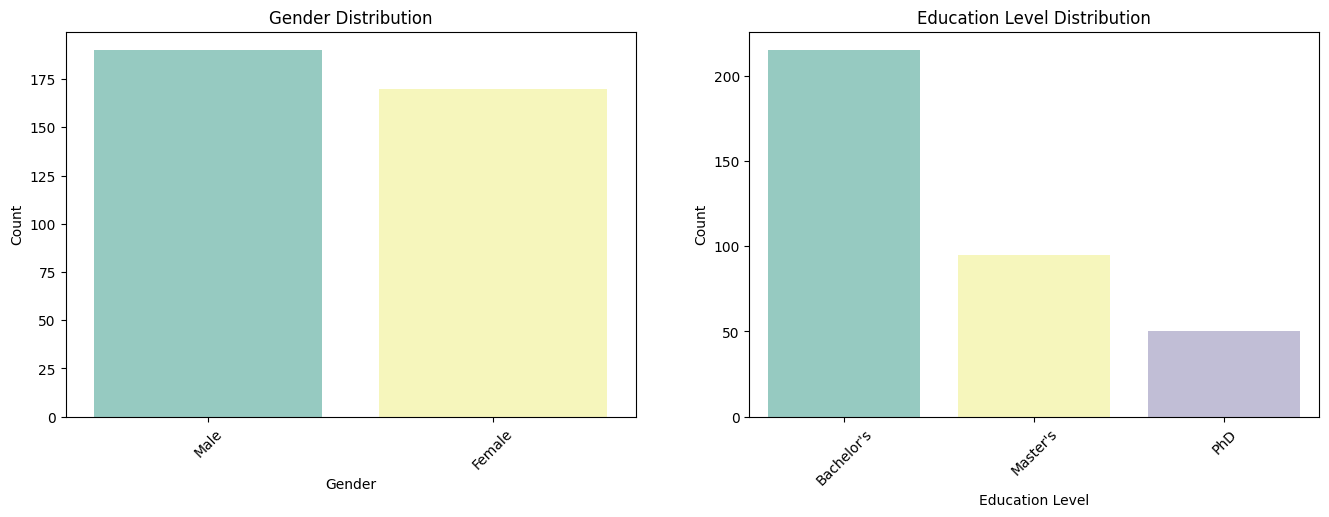

In [ ]:
def plot_distribuciones_categoricas(df, categorical):
    '''Recibe un dataframe y sus columnas categóricas y realiza
    un gráfico de distribuciones para cada una de ellas.'''
    num_plots = len(categorical)
    num_rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)

    fig, axes = plt.subplots(num_rows, 3, figsize=(25, num_rows * 5))
    fig.subplots_adjust(hspace=0.5)

    axes = axes.flatten()

    for i, var in enumerate(categorical):
        sns.countplot(data=df, x=var, palette="Set3", ax=axes[i])
        axes[i].set_title(f'{var} Distribution')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    # Eliminamos subgráficos vacíos si es necesario
    for j in range(num_plots, num_rows * 3):
        fig.delaxes(axes[j])

    plt.show()

categorical = ["Gender", "Education Level"]
plot_distribuciones_categoricas(data, categorical)

Observamos que existe un cierto desbalance entre los títulos, al parecer a medida que el título es mayor, la cantidad de gente que lo tiene es menor. Se decide no hacer nada al respecto por ahora, se analizará más adelante en la sección de desarrollo de los modelos en caso de que genere problemas.

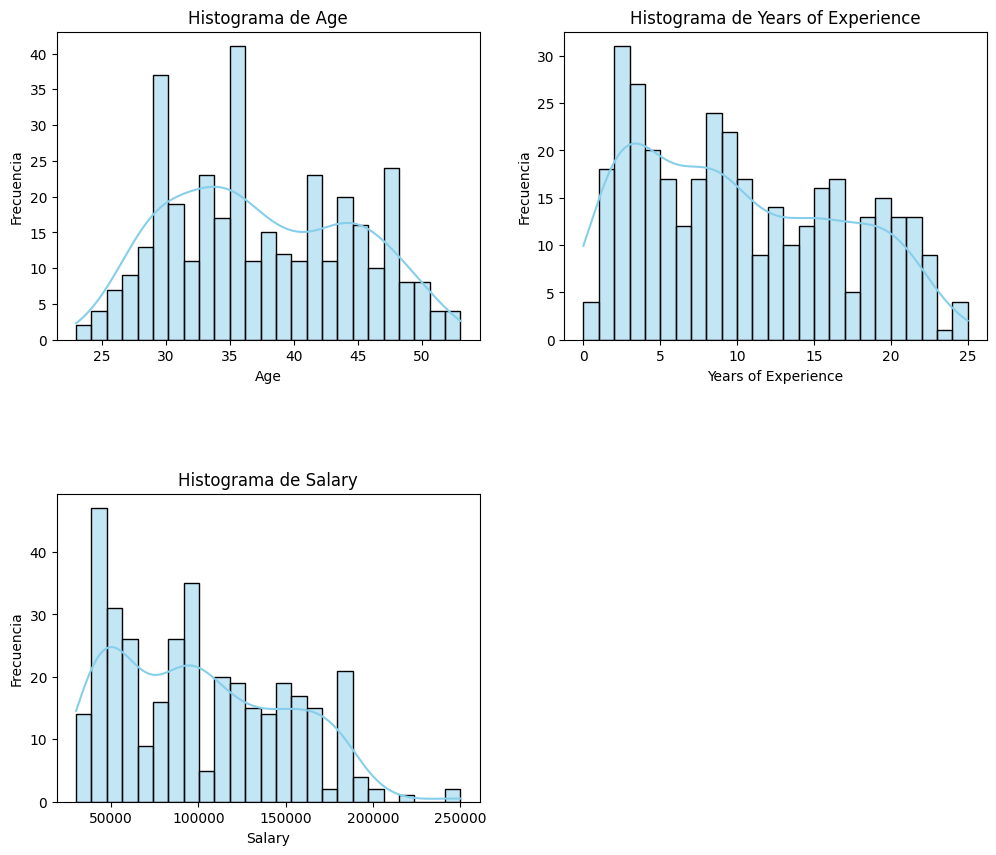

In [ ]:
def plot_histogramas(df, numerical):
    num_cols = len(numerical)
    num_rows = (num_cols // 2) + (1 if num_cols % 2 != 0 else 0)

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))
    fig.subplots_adjust(hspace=0.5)

    for i, column in enumerate(numerical):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        sns.histplot(df[column], bins=25, kde=True, ax=ax, color='skyblue')
        ax.set_title(f'Histograma de {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frecuencia')

    # Eliminar el último subplot si hay un número impar de columnas
    if num_cols % 2 != 0:
        fig.delaxes(axes[num_rows-1, 1])

    plt.show()

# Uso de la función
numerical = ["Age", "Years of Experience", "Salary"]
plot_histogramas(data, numerical)

No notamos nada extraño en las distribuciones, más que las modas (lo cual resulta sospechoso en el caso de la edad). En el caso del salario, es de esperar que se elijan números redondos.

#### Scatter plot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


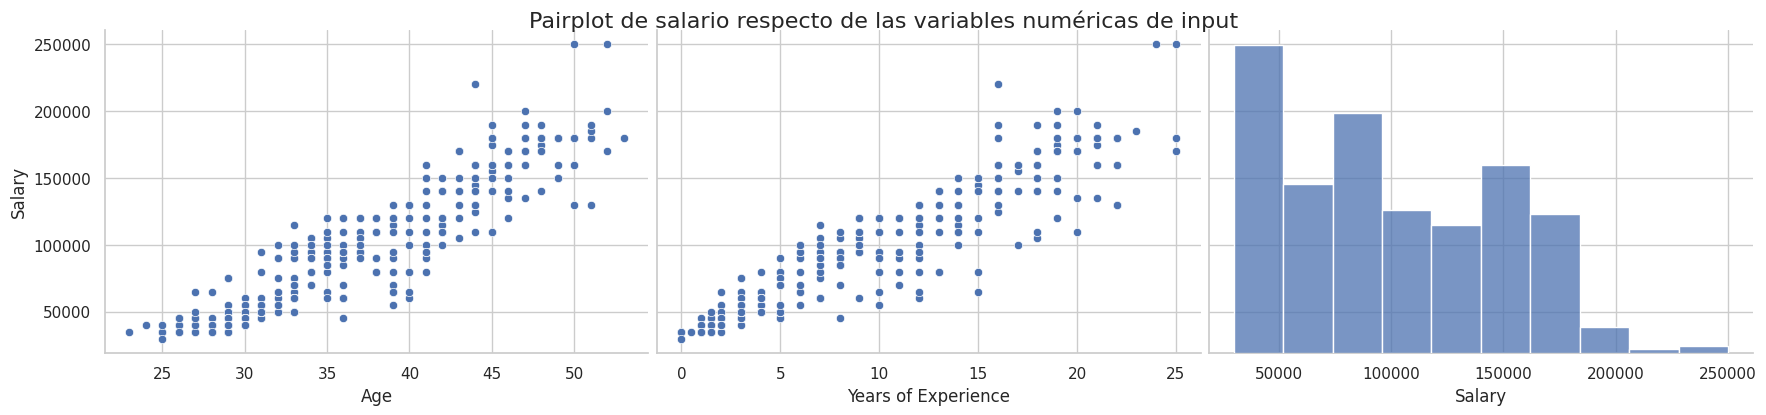

In [ ]:
def plot_pairplot(df, target_vars):
    sns.set(style='whitegrid')
    # Generate the pairplot
    pairplot = sns.pairplot(df, y_vars=target_vars, x_vars=df[numerical].columns,
                            height=4, aspect=1.5, kind='scatter', palette='viridis')

    # Add a general title
    pairplot.fig.suptitle('Pairplot de salario respecto de las variables numéricas de input', y=1.02, fontsize=16)

    # Show the plot
    plt.show()

# Uso de la función
target_variables = ["Salary"]
plot_pairplot(data, target_variables)

#### Box plots

<ipython-input-13-ef72445940e0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=target_var, ax=ax, palette='viridis')
<ipython-input-13-ef72445940e0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=target_var, ax=ax, palette='viridis')


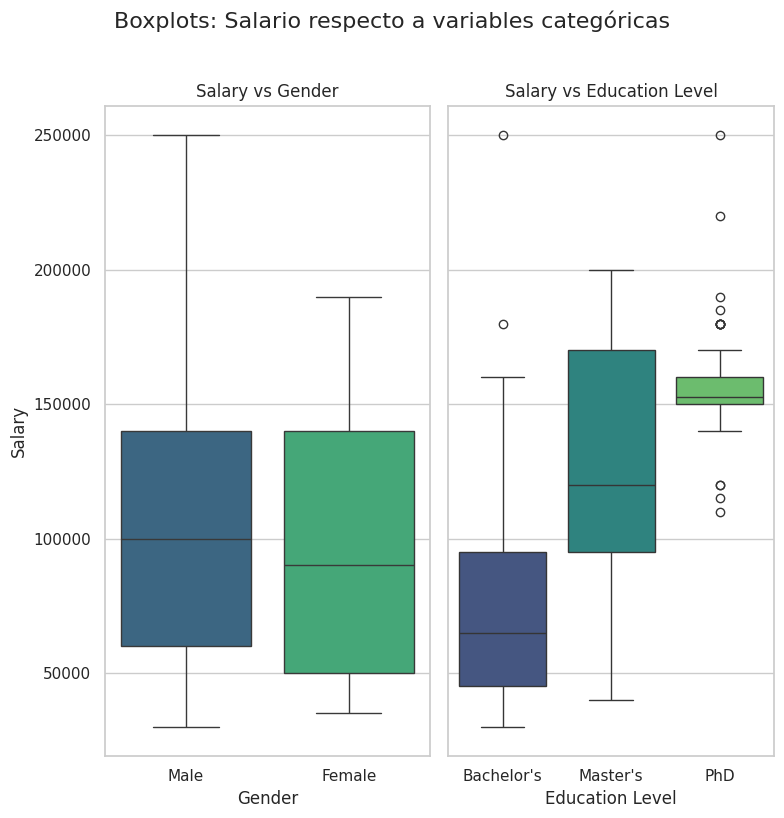

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_boxplots(df, target_var, categorical_vars):
    sns.set(style='whitegrid')

    # Create subplots for each categorical variable
    num_vars = len(categorical_vars)
    fig, axes = plt.subplots(nrows=1, ncols=num_vars, figsize=(8, num_vars * 4), sharey=True)
    fig.subplots_adjust(hspace=0.4)

    for i, cat_var in enumerate(categorical_vars):
        ax = axes[i] if num_vars > 1 else axes  # Handle single subplot case
        sns.boxplot(data=df, x=cat_var, y=target_var, ax=ax, palette='viridis')
        ax.set_title(f'{target_var} vs {cat_var}')
        ax.set_xlabel(cat_var)
        ax.set_ylabel(target_var)

    plt.suptitle('Boxplots: Salario respecto a variables categóricas', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

# Uso de la función
plot_categorical_boxplots(data, "Salary", categorical)


No notamos tendencias significativas en el género. Se puede observar que a mayor grado del título se tiene una mayor remuneración (sin embargo, notar que el título de grado tiene un mayor rango intercuartil, por lo que una mayor varianza que el título de doctorado)

#### Correlación

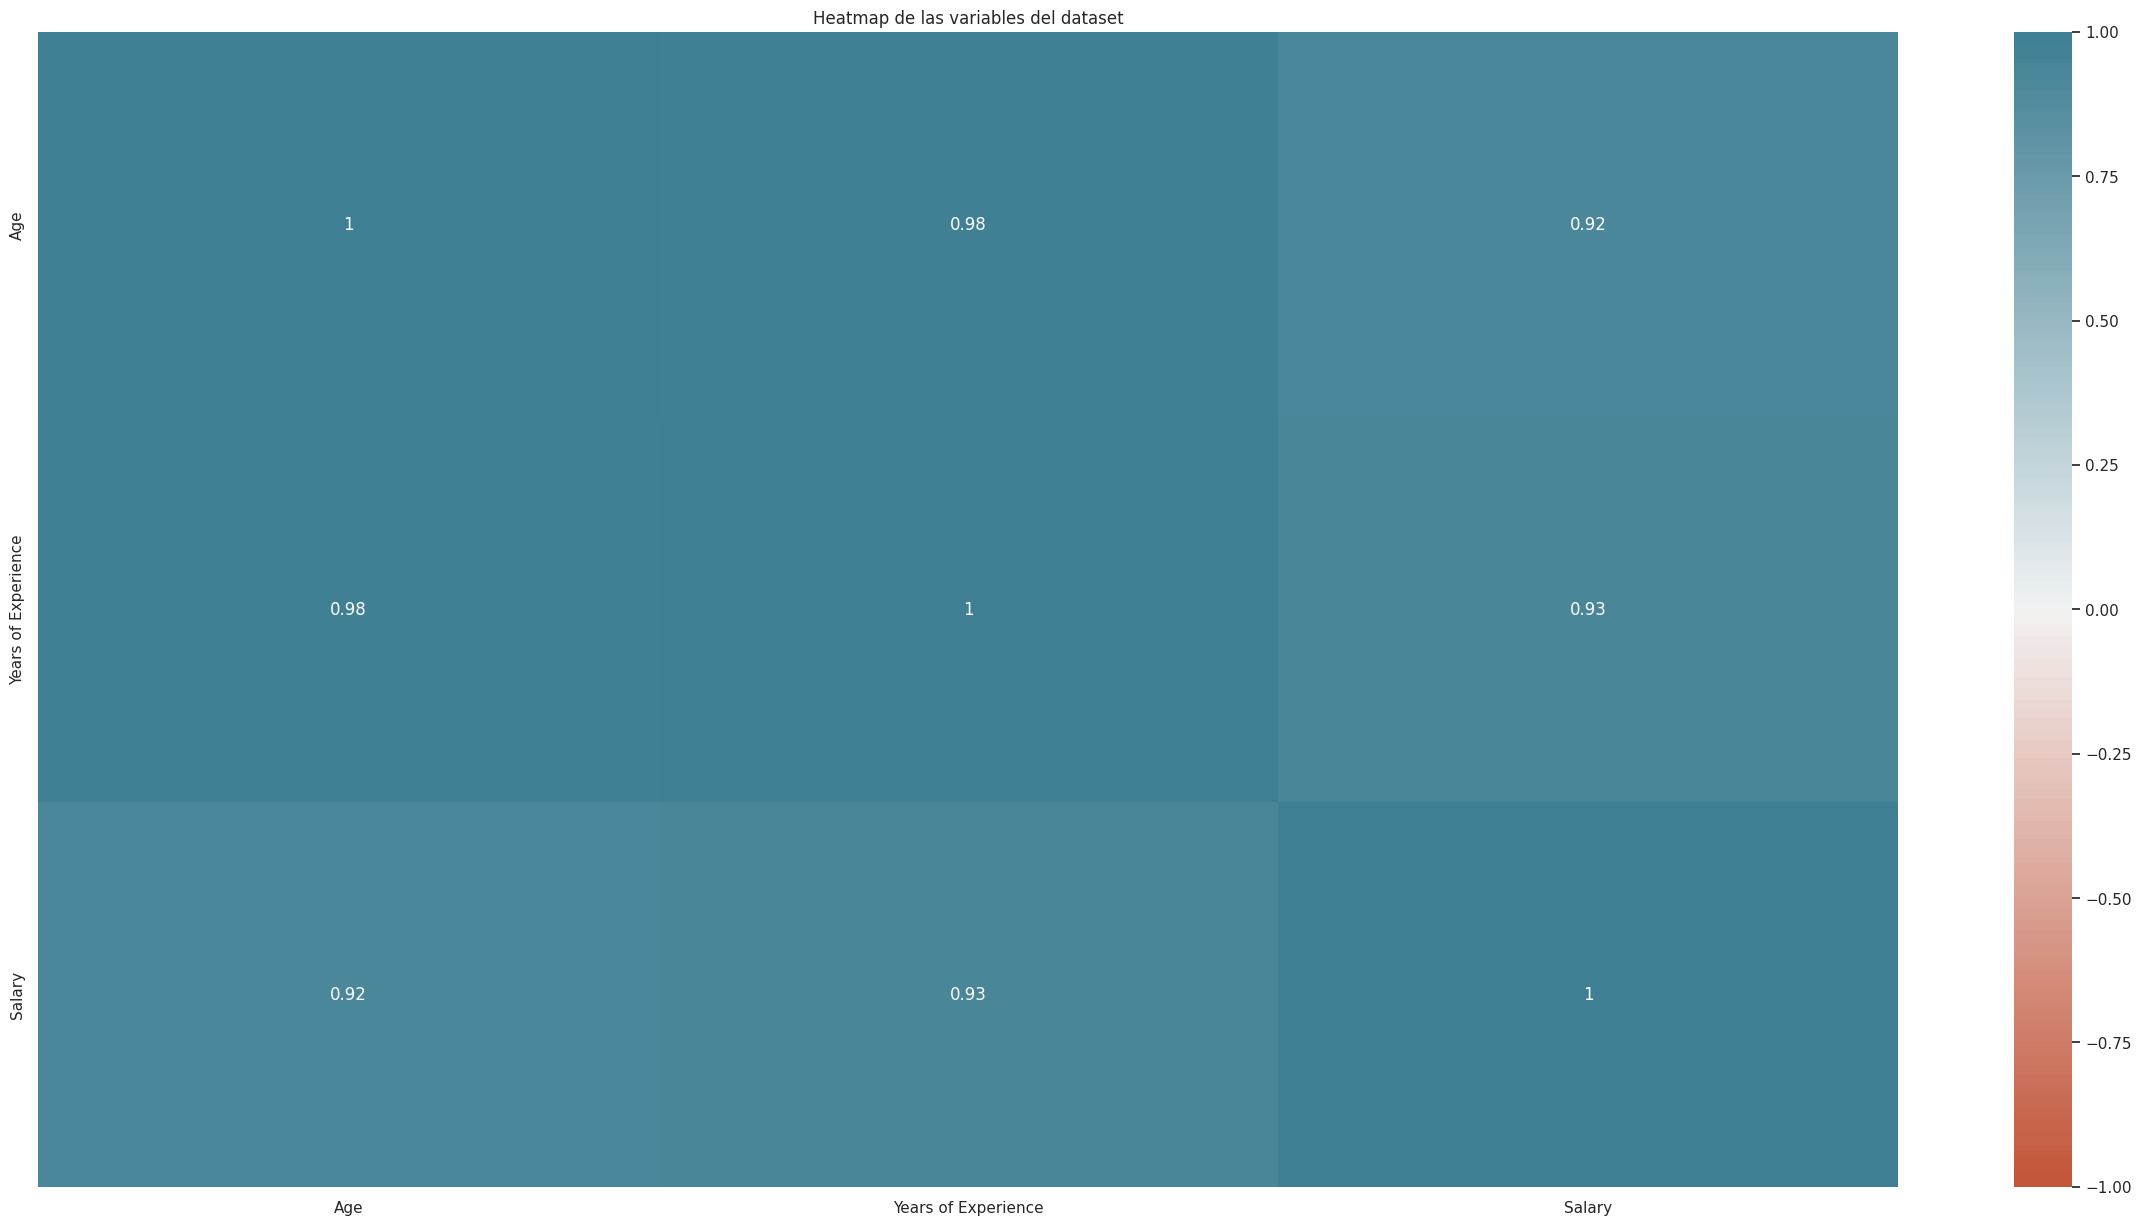

In [ ]:
def plot_heatmap(df):
    '''Recibe un dataframe y grafica el mapa de calor
    para correlaciones entre sus variables.'''

    matrix_corr = df.corr()
    plt.figure(figsize=(30, 15))
    ax = sns.heatmap(
        matrix_corr,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        annot=True
    )
    plt.title('Heatmap de las variables del dataset')
    plt.show()

plot_heatmap(data[numerical])

Concluimos que, además de que exista una gran correlación entre la edad y la experiencia y el título (esperable), existe también un gran correlación entre las variables explicativas numéricas y la objetivo. Es por esto que un buen modelo base podría ser una regresión lineal que tome alguna de las dos variables numéricas (o las dos).

### Estandarización
Se decide estandarizar estandarizar las variables explicativas mediante z-score. La variable objetivo se decide mantener como está.

Como es una técnica que puede causar fuga de datos, se decide hacer al momento de

In [ ]:
# numerical_explicative = list(set(numerical) - set(['Salary']))
# def standarize_numerical_variables(data):
#   # Inicializamos la instancia
#   scaler = StandardScaler()
#   scaled_data = scaler.fit_transform(data[numerical_explicative])

#   data[numerical_explicative] = scaled_data

## Variables Categóricas

### Feature Engineering
Respecto a los campos de género y nivel de educación, no hay problema respecto a las categorías, podemos usar one hot encoding sin problema. Sin embargo, tenemos complicaciones en el campo Job Title, pues si hacemos un unique vemos que existen 174 distintos tipos de títulos, con solamente 370 datos. Como estos datos son relevantes respecto al salario, tenemos que llegar a una manera de incluirlos.

In [ ]:
# Distintas variables categóricas
print(data_input["Gender"].unique())
print(data_input["Education Level"].unique())
print((data_input["Job Title"].unique()))
print(len((data_input["Job Title"].unique())))

['Male' 'Female' nan]
["Bachelor's" "Master's" 'PhD' nan]
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 nan 'Event Co

Dentro del notebook Pwc-JobTitleEmbedding.ipynb se realiza una análisis de la columna Job Title.

Este análisis consiste en usar un modelo embedder de texto para vectorizar las descripciones brindadas en un espacio latente de 1024 dimensiones y luego visualizarlas respecto del título del trabajo mediante el método t-SNE.

Esto fue hecho debido a que el analista (yo) no posee conocimiento acerca de la totalidad de los trabajos, por lo que para llegar a una categorización reducida, se necesita una ayuda para poder agrupar los títulos.

Consultar dicho notebook para la visualización

#### Conclusiones
Se decide que la mejor manera de incluir Job Title vectorizarlo usando one hot encoding según el próximo criterio

In [ ]:
# Departamentos
data["Finance"] = data["Job Title"].str.contains("Finance|Financial|Accountant|Accountance|Accountancy", case=False).astype(int)
data["HR"] = data["Job Title"].str.contains("HR|Human|Recruiter", case=False).astype(int)
data["Marketing"] = data["Job Title"].str.contains("Marketing|Market|Creative|Social Media|Copywriter|Public Relations|Content|Advertising", case=False).astype(int)
data["Sales"] = data["Job Title"].str.contains("Sales|Sale|Business", case=False).astype(int)
data["Customer Support"] = data["Job Title"].str.contains("Customer|Account|IT|Technical Writer|Help Desk|Technical Support", case=False).astype(int)
data["Operations"] = data["Job Title"].str.contains("CEO|Operation|Office|Administrative|Supply Chain", case=False).astype(int)
data["Data"] = data["Job Title"].str.contains("Data", case=False).astype(int)
data["Analyst"] = data["Job Title"].str.contains("Analyst", case=False).astype(int)
data["Scientist"] = data["Job Title"].str.contains("Scientist|Researcher", case=False).astype(int)
data["Project"] = data["Job Title"].str.contains("Project", case=False).astype(int)
data["Product"] = data["Job Title"].str.contains("Product", case=False).astype(int)
data["Engineer"] = data["Job Title"].str.contains("Engineer", case=False).astype(int)
data["Development"] = data["Job Title"].str.contains("Network|Software|Quality|Developer|Designer|Web|UX", case=False).astype(int)

# Seniority
data["Junior"] = data["Job Title"].str.contains("Junior", case=False).astype(int)
data["Senior"] = data["Job Title"].str.contains("Senior", case=False).astype(int)
data["Director"] = data["Job Title"].str.contains("Chief|CEO|Director", case=False).astype(int)
data["Manager"] = data["Job Title"].str.contains("Manager", case=False).astype(int)


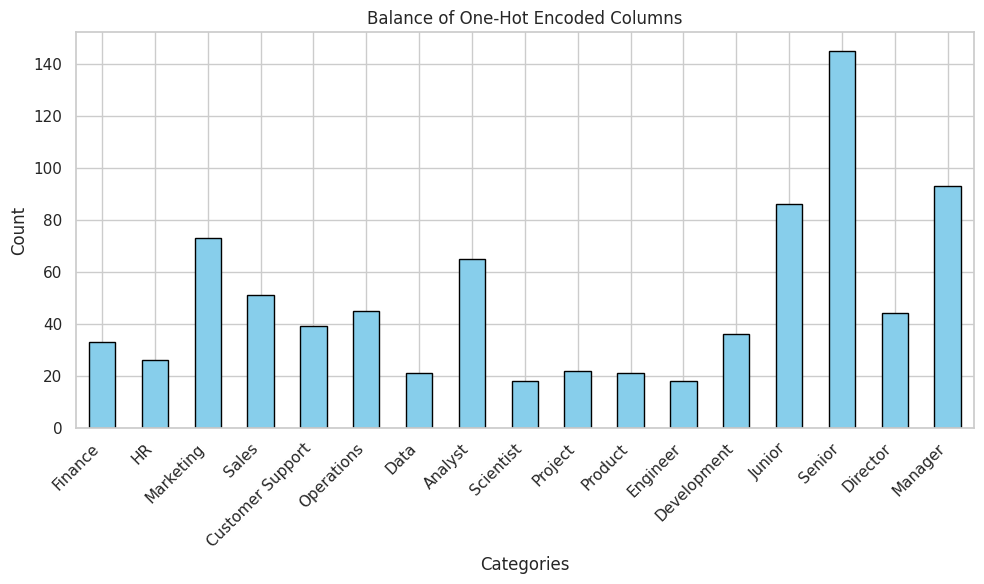

In [ ]:
new_columns = [col for col in data.columns if col not in numerical+categorical+["Job Title"]]
# Sum the values in each of the new one-hot columns
column_sums = data[new_columns].sum()

# Plot the results
plt.figure(figsize=(10, 6))
column_sums.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Balance of One-Hot Encoded Columns")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Parece que la segmentación de los títulos ha sido medianamente exitosa. Algunas clases presentan complicaciones respecto a la poca cantidad de registros de estas.

Alternativas:
- PCA sobre el embedding de Job Title: Trae complicaciones al depender de un embedder, además de que se necesita también la descripción del trabajo. La poca cantidad de datos complica el uso de las componentes principales en un modelo.

In [ ]:
# One-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical, drop_first=False)
data_encoded.drop(columns=["Job Title"], inplace=True)
data_encoded


,Age,Years of Experience,Salary,Finance,HR,Marketing,Sales,Customer Support,Operations,Data,...,Development,Junior,Senior,Director,Manager,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD
0,32.0,5.0,90000.0,0,0,0,0,0,0,0,...,1,0,0,0,0,False,True,True,False,False
1,28.0,3.0,65000.0,0,0,0,0,0,0,1,...,0,0,0,0,0,True,False,False,True,False
2,45.0,15.0,150000.0,0,0,0,0,0,0,0,...,0,0,1,0,1,False,True,False,False,True
3,36.0,7.0,60000.0,0,0,0,1,0,0,0,...,0,0,0,0,0,True,False,True,False,False
4,52.0,20.0,200000.0,0,0,0,0,0,0,0,...,0,0,0,1,0,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,35.0,8.0,85000.0,0,0,1,0,0,0,0,...,0,0,1,0,0,True,False,True,False,False
371,43.0,19.0,170000.0,0,0,0,0,0,1,0,...,0,0,0,1,0,False,True,False,True,False
372,29.0,2.0,40000.0,0,0,0,0,0,0,0,...,0,1,0,0,1,True,False,True,False,False
373,34.0,7.0,90000.0,0,0,0,0,0,1,0,...,0,0,1,0,0,False,True,True,False,False


In [ ]:
data_encoded.to_csv("data/final_data.csv", index=False)